# Final Project: Microplastic Sampling in Ocean Water
Data Obtained from: https://www.ncei.noaa.gov/products/microplastics

In [3]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

raw = pd.read_csv("pacific_data.csv")

raw.head()

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,...,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y
0,11407,Pacific Ocean,NaN,NaN,Neuston net,0.02557,pieces/m3,0.005-1,Medium,Eriksen et al.2018,...,5 Gyres Institute,AVANI Net; SV Mir; RV Cabo de Hornos,275967,https://www.ncei.noaa.gov/access/metadata/land...,-27.01313,-107.57368,10/27/2015 12:00:00 AM,8d80f8f3-f888-4da6-9920-b4b22c502c04,-107.57368,-27.01313
1,6830,Pacific Ocean,NaN,NaN,Neuston net,0.00000,pieces/m3,0-0.0005,Very Low,Law et al.2014,...,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,5.79000,-147.72000,12/10/2004 12:00:00 AM,013ec1c0-bc72-4f5a-82ce-8f9ce8c2a0b4,-147.72000,5.79000
2,6498,Pacific Ocean,NaN,NaN,Neuston net,0.00000,pieces/m3,0-0.0005,Very Low,Law et al.2014,...,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,9.55000,-146.63000,4/22/2003 12:00:00 AM,47857610-6351-4dcc-a92f-023a66852c6b,-146.63000,9.55000
3,7494,Pacific Ocean,NaN,NaN,Neuston net,0.00000,pieces/m3,0-0.0005,Very Low,Law et al.2014,...,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,19.24000,-143.41000,5/20/2008 12:00:00 AM,81d1c1ed-438b-476d-a494-3624e68c4dcf,-143.41000,19.24000
4,8087,Pacific Ocean,NaN,NaN,Neuston net,0.00000,pieces/m3,0-0.0005,Very Low,Law et al.2014,...,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,23.52000,-141.63000,3/7/2011 12:00:00 AM,444fbec3-4df0-46ae-90e8-45f4adcbb3d1,-141.63000,23.52000


### EDA
1. Summarize the data
2. Get basic statistics on the data

In [4]:
# Summarize data 
raw.info()
# Get basic stats
numerical_raw = raw.select_dtypes(include=['float64', 'int64'])
numerical_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          4700 non-null   int64  
 1   Oceans            4700 non-null   object 
 2   Regions           278 non-null    object 
 3   SubRegions        0 non-null      float64
 4   Sampling Method   4700 non-null   object 
 5   Measurement       4334 non-null   float64
 6   Unit              4700 non-null   object 
 7   Density Range     4700 non-null   object 
 8   Density Class     4700 non-null   object 
 9   Short Reference   4700 non-null   object 
 10  Long Reference    4700 non-null   object 
 11  DOI               4700 non-null   object 
 12  Organization      4700 non-null   object 
 13  Keywords          4700 non-null   object 
 14  Accession Number  4700 non-null   int64  
 15  Accession Link    4700 non-null   object 
 16  Latitude          4700 non-null   float64


,OBJECTID,SubRegions,Measurement,Accession Number,Latitude,Longitude,x,y
count,4700.000000,0.0,4334.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000
mean,10135.699787,NaN,110.533026,234769.940426,23.719753,-138.047959,-138.047959,23.719753
std,3694.689382,NaN,742.219973,29714.884345,16.578365,17.605310,17.605310,16.578365
min,6137.000000,NaN,0.000000,170967.000000,-55.720400,-169.182500,-169.182500,-55.720400
25%,7318.750000,NaN,0.000000,211008.000000,17.550000,-149.900000,-149.900000,17.550000
50%,8493.500000,NaN,0.004320,211008.000000,26.140000,-142.770000,-142.770000,26.140000
75%,12437.250000,NaN,0.472526,275968.000000,33.100000,-128.274925,-128.274925,33.100000
max,21382.000000,NaN,21156.558533,278270.000000,66.220000,-84.485100,-84.485100,66.220000


### Data Cleaning and Transformation
1. Remove empty column
2. Drop any null numerical rows 
3. Standardize units
4. Normalize numerical data

In [5]:
# remove nulls
raw.drop(columns=['SubRegions'], inplace=True)
raw.info()

cleaned = raw[raw['Measurement'] > 0]
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          4700 non-null   int64  
 1   Oceans            4700 non-null   object 
 2   Regions           278 non-null    object 
 3   Sampling Method   4700 non-null   object 
 4   Measurement       4334 non-null   float64
 5   Unit              4700 non-null   object 
 6   Density Range     4700 non-null   object 
 7   Density Class     4700 non-null   object 
 8   Short Reference   4700 non-null   object 
 9   Long Reference    4700 non-null   object 
 10  DOI               4700 non-null   object 
 11  Organization      4700 non-null   object 
 12  Keywords          4700 non-null   object 
 13  Accession Number  4700 non-null   int64  
 14  Accession Link    4700 non-null   object 
 15  Latitude          4700 non-null   float64
 16  Longitude         4700 non-null   float64


In [6]:
# standardize units 
units = cleaned['Unit'].unique()
print(units)

# convert date format
cleaned['Date'] = pd.to_datetime(cleaned['Date'])
print(cleaned['Date'])

#convert object id to int
cleaned['OBJECTID'] = cleaned['OBJECTID'].astype(int)

# inspect method values
methods = cleaned['Sampling Method'].unique()
print(methods)

['pieces/m3']
0      2015-10-27
6      2015-08-12
7      2007-12-13
8      2012-04-04
10     2019-11-28
          ...    
4691   2003-02-13
4692   2012-10-30
4694   2011-02-14
4695   2019-07-15
4698   2019-03-04
Name: Date, Length: 2627, dtype: datetime64[ns]
['Neuston net' 'Manta net' 'Grab sample' 'Intake seawater pump'
 'PVC cylinder' 'Plankton net' 'AVANI net']


C:\Users\dorky\AppData\Local\Temp\ipykernel_13888\3798833641.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned['Date'] = pd.to_datetime(cleaned['Date'])
C:\Users\dorky\AppData\Local\Temp\ipykernel_13888\3798833641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['Date'] = pd.to_datetime(cleaned['Date'])
C:\Users\dorky\AppData\Local\Temp\ipykernel_13888\3798833641.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [7]:
# Normalize data for measurement column
numerical_cleaned = cleaned.select_dtypes(include=['float64', 'int64'])

target = numerical_cleaned['Measurement']
numerical_cleaned['measurement_normalized'] = (target - target.mean()) / target.std()  
print(numerical_cleaned)

      OBJECTID  Measurement  Accession Number   Latitude   Longitude  \
0        11407     0.025570            275967 -27.013130 -107.573680   
6        12664     0.953208            276264  33.525000 -151.116650   
7         7423     0.043196            211008  11.090000 -156.770000   
8         8419     0.018584            211008  13.690000 -156.870000   
10       12332     1.009209            276264  24.433283 -144.864700   
...        ...          ...               ...        ...         ...   
4691      6443     0.002400            211008  19.360000 -156.380000   
4692      8607     0.514480            211008  19.950000 -156.160000   
4694      8066     0.003324            211008  27.330000 -142.180000   
4695     12394    11.416893            276264  32.080000 -142.460000   
4698     12443     0.030317            276264  51.778250 -144.507667   

               x          y  measurement_normalized  
0    -107.573680 -27.013130               -0.192634  
6    -151.116650  33.525000

### Data Joining 
1. Merge numerical cleaned onto categorical data

In [8]:
numerical = numerical_cleaned[['OBJECTID', 'Measurement', 'x', 'y', 'measurement_normalized']]
categorical = cleaned[['OBJECTID', 'Sampling Method', 'Density Range', 'Density Class', 'Date']]

merged = pd.merge(numerical, categorical, on='OBJECTID')
print(merged)

      OBJECTID  Measurement           x          y  measurement_normalized  \
0        11407     0.025570 -107.573680 -27.013130               -0.192634   
1        12664     0.953208 -151.116650  33.525000               -0.191654   
2         7423     0.043196 -156.770000  11.090000               -0.192615   
3         8419     0.018584 -156.870000  13.690000               -0.192641   
4        12332     1.009209 -144.864700  24.433283               -0.191595   
...        ...          ...         ...        ...                     ...   
2622      6443     0.002400 -156.380000  19.360000               -0.192659   
2623      8607     0.514480 -156.160000  19.950000               -0.192118   
2624      8066     0.003324 -142.180000  27.330000               -0.192658   
2625     12394    11.416893 -142.460000  32.080000               -0.180599   
2626     12443     0.030317 -144.507667  51.778250               -0.192629   

     Sampling Method Density Range Density Class       Date  
0

### Data Visualization
1. Where are the densest samplings by longitude and latitude? 
2. What is the most used sampling method?

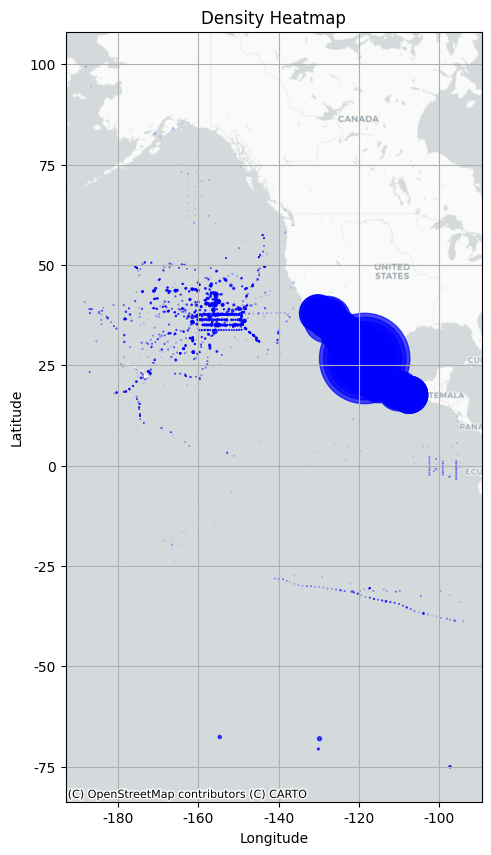

In [9]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

geometry = [Point(xy) for xy in zip(merged['x'], merged['y'])]
gdf = gpd.GeoDataFrame(merged, geometry=geometry)

gdf.set_crs('EPSG:4326', allow_override=True, inplace=True)
gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10,10))
plt.title('Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Adjust x-axis and y-axis tick labels
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * 1e-5)}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * 1e-5)}'))

gdf.plot(ax=ax, marker='o', color='blue', markersize=gdf['Measurement'] / 5, alpha=0.7)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

plt.show()


               x          y  OBJECTID  Measurement
6    -117.170100  32.764300      8751     0.041000
12    -96.518496  15.663106     15343  1410.437236
23   -116.609493  31.828258     15535  1410.437236
25    -98.915883  16.538785     15366  3526.093089
27   -104.386990  19.117731     15389  4231.311707
...          ...        ...       ...          ...
2594  -96.518496  15.663106     15348   705.218618
2600 -119.963900  32.424300     10473     0.042000
2602 -117.624100  33.422800      8856     0.002000
2604 -109.170000  24.380000      6151     0.002160
2617 -116.926193  32.232574     15491  2820.874471

[275 rows x 4 columns]


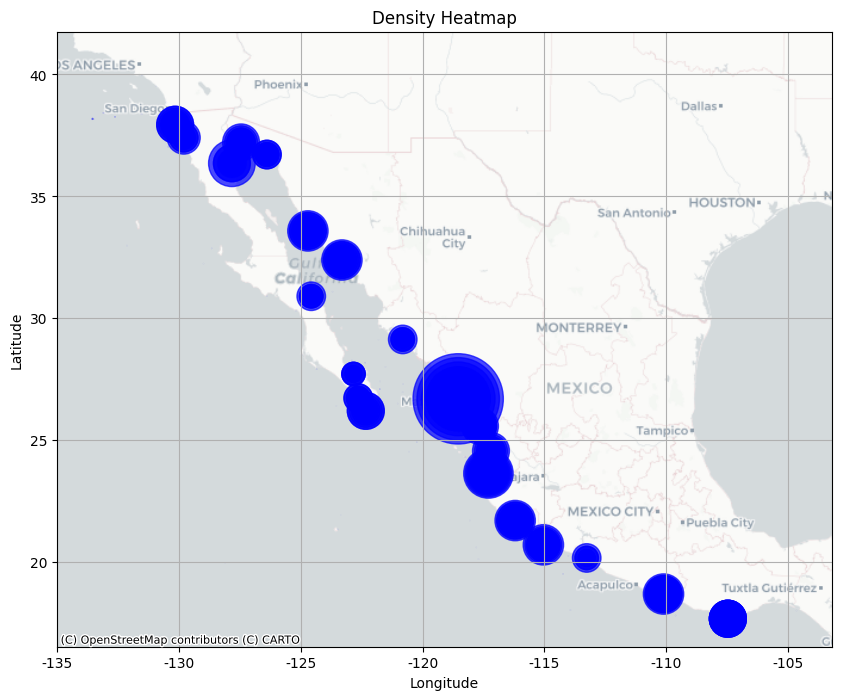

In [10]:
north_america = merged[(merged['y'] >= 15) & (merged['y'] <= 45) & 
                       (merged['x'] >= -120) & (merged['x'] <= 100)][['x', 'y', 'OBJECTID', 'Measurement']]

#coastal = merged[(merged['x'] >= -150) & (merged['x'] <= 80)]
print(north_america)
#print(merged['x'])

geometry = [Point(xy) for xy in zip(north_america['x'], north_america['y'])]
gdf = gpd.GeoDataFrame(north_america, geometry=geometry)

gdf.set_crs('EPSG:4326', allow_override=True, inplace=True)
gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10,10))
plt.title('Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Adjust x-axis and y-axis tick labels
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * 1e-5)}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * 1e-5)}'))

gdf.plot(ax=ax, marker='o', color='blue', markersize=gdf['Measurement'] / 5, alpha=0.7)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

plt.show()

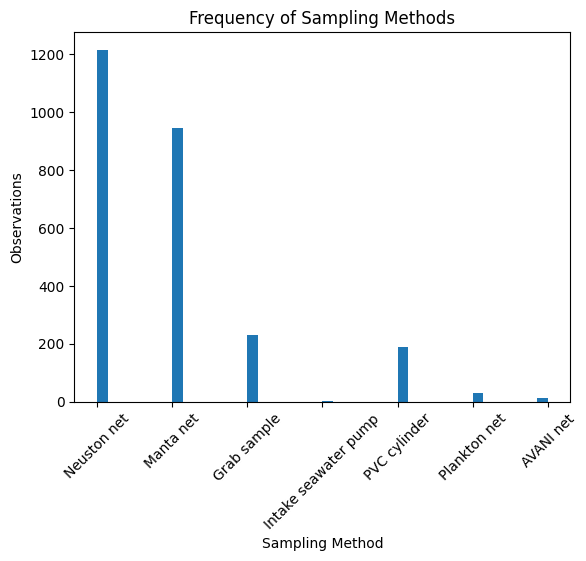

In [11]:
# most used sampling method
plt.hist(merged['Sampling Method'], bins='auto')
plt.title('Frequency of Sampling Methods')
plt.xlabel('Sampling Method')
plt.ylabel('Observations')
plt.xticks(rotation=45)
plt.show()

### Data Aggregation 

In [12]:
# look at sample location...
grid_size = 1
merged['x_grid'] = (merged['x'] // grid_size).astype(int)
merged['y_grid'] = (merged['y'] // grid_size).astype(int)

sample_density = merged.groupby(['x_grid', 'y_grid']).size().reset_index(name='sample_density')

measurement_density = merged.groupby(['x_grid', 'y_grid'])['Measurement'].mean().reset_index(name='measurement_density')

density = pd.merge(sample_density, measurement_density, on=['x_grid', 'y_grid'])

# calculate correlation between sample density and measurement density
correlation = density[['sample_density', 'measurement_density']].corr().iloc[0,1]
print(correlation)

0.1645265992290459


With a correlation value of 0.16, this indicates there is not sufficient evidence that there is a correlation between the sample density and the measurement density in a geographic area. 

### KDE Analysis
- Disclosure: investigated using ChatGPT

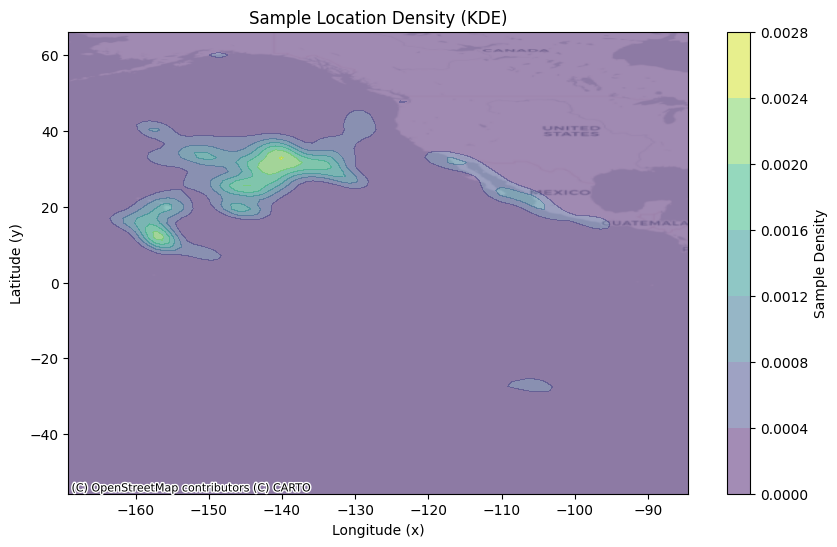

In [13]:
# KDE method
from scipy.stats import gaussian_kde

sample_coords = merged[['x', 'y']].values.T 

# Apply KDE to sample coordinates
kde_samples = gaussian_kde(sample_coords, bw_method=0.1)

# Evaluate the KDE over a grid
x_grid = np.linspace(merged['x'].min(), merged['x'].max(), 100)
y_grid = np.linspace(merged['y'].min(), merged['y'].max(), 100)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
grid_coords = np.vstack([x_mesh.ravel(), y_mesh.ravel()])

# Get the density values
sample_density = kde_samples(grid_coords)

# Reshape the output back into the shape of the grid
sample_density_reshaped = sample_density.reshape(x_mesh.shape)

# Plot the sample density
plt.figure(figsize=(10, 6))
plt.contourf(x_mesh, y_mesh, sample_density_reshaped, cmap='viridis', alpha=0.5)

# Add the basemap using Contextily (with CartoDB.Positron provider)
ax = plt.gca()  # Get the current axis
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)

plt.colorbar(label='Sample Density')
plt.title('Sample Location Density (KDE)')
plt.xlabel('Longitude (x)')
plt.ylabel('Latitude (y)')
plt.show()

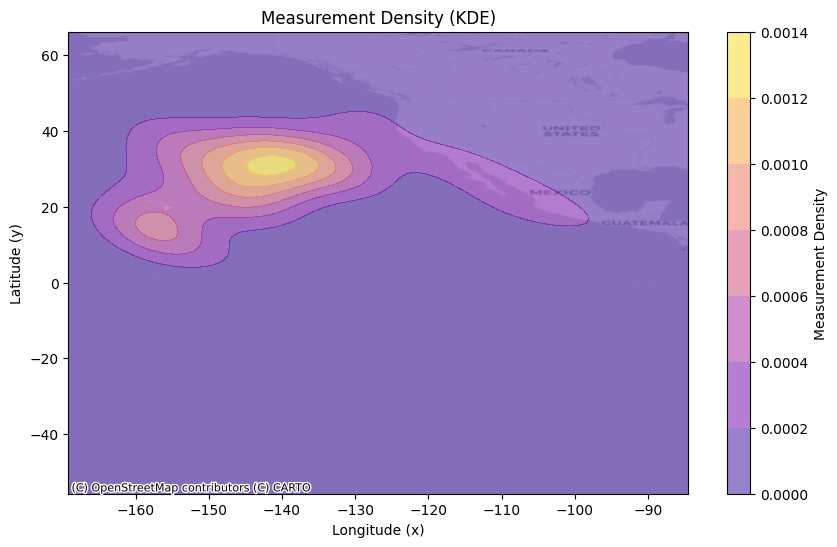

In [14]:
# Assuming you have a 'measurement' column
measurement_values = merged[['x', 'y', 'Measurement']]

# Apply KDE for each unique (x, y) pair but now considering measurements
kde_measurements = gaussian_kde(measurement_values[['x', 'y']].values.T, bw_method='silverman')

# Evaluate the measurement density over the same grid
measurement_density = kde_measurements(grid_coords)

# Reshape measurement density for plotting
measurement_density_reshaped = measurement_density.reshape(x_mesh.shape)

# Plot the measurement density
plt.figure(figsize=(10, 6))
plt.contourf(x_mesh, y_mesh, measurement_density_reshaped, cmap='plasma', alpha=0.5)

# Add the basemap using Contextily (with CartoDB.Positron provider)
ax = plt.gca()  # Get the current axis
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)

plt.colorbar(label='Measurement Density')
plt.title('Measurement Density (KDE)')
plt.xlabel('Longitude (x)')
plt.ylabel('Latitude (y)')
plt.show()


In [16]:
# Flatten the densities to make them 1D arrays for correlation analysis
sample_density_flat = sample_density_reshaped.ravel()
measurement_density_flat = measurement_density_reshaped.ravel()

# Remove NaNs (where there might not be any density)
valid_indices = ~np.isnan(sample_density_flat) & ~np.isnan(measurement_density_flat)
sample_density_flat = sample_density_flat[valid_indices]
measurement_density_flat = measurement_density_flat[valid_indices]

# Calculate the Pearson correlation coefficient
correlation = np.corrcoef(sample_density_flat, measurement_density_flat)[0, 1]
print(f"Correlation between sample density and measurement density: {correlation}")

Correlation between sample density and measurement density: 0.8874832221648932


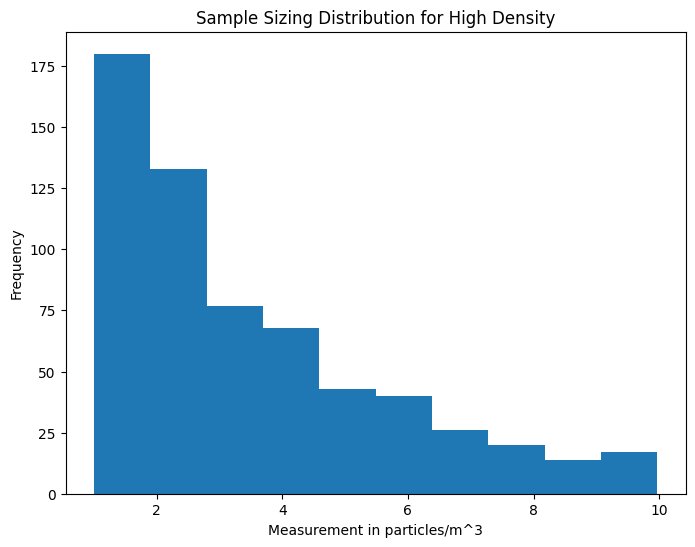

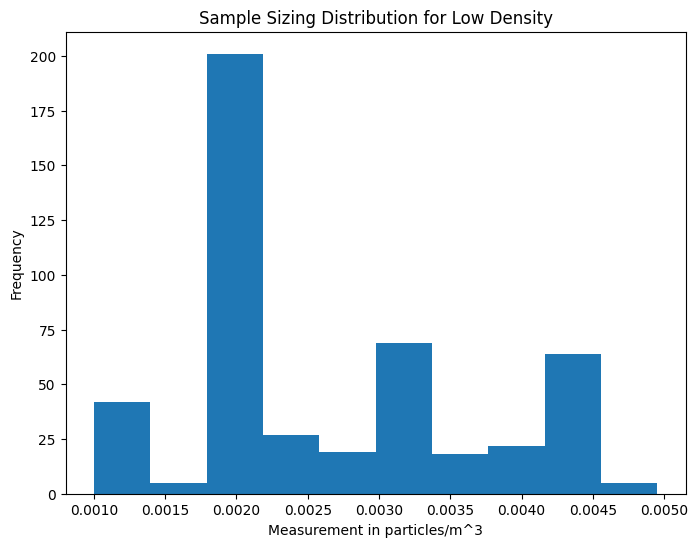

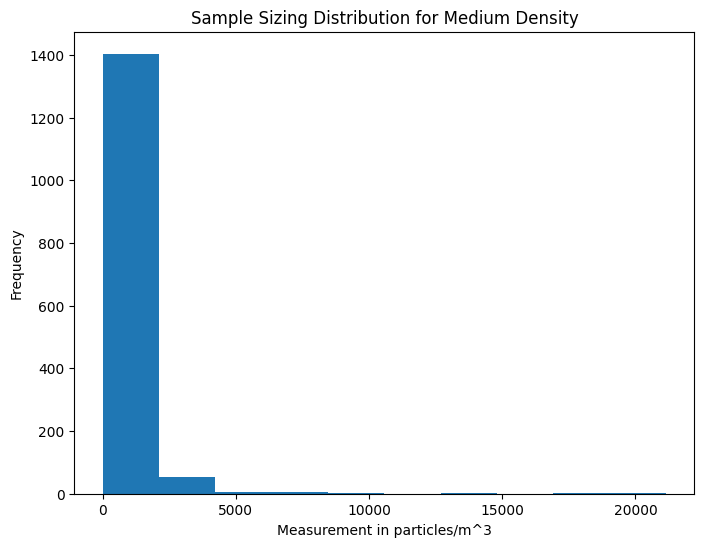

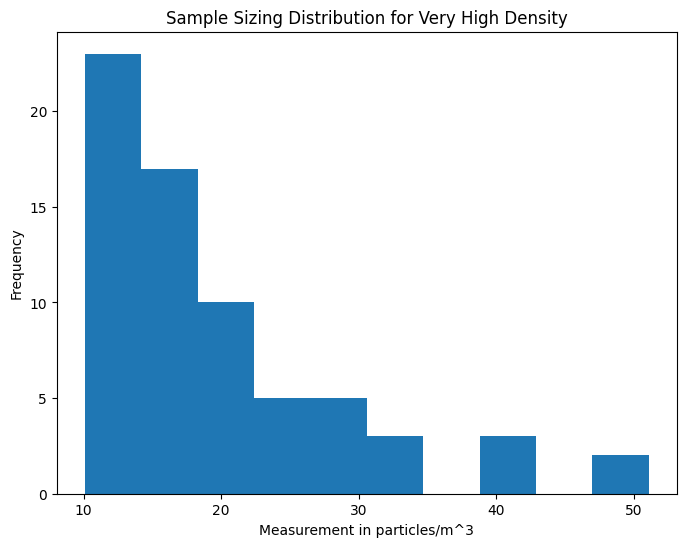

In [15]:
# look at average measurements
sample_sizes = merged.groupby('Density Class')
for sample, size in sample_sizes:
    plt.figure(figsize=(8,6))
    plt.hist(size['Measurement'])
    plt.title(f"Sample Sizing Distribution for {sample} Density")
    plt.xlabel('Measurement in particles/m^3')
    plt.ylabel('Frequency')
    plt.show()